<a href="https://colab.research.google.com/github/FrancisKurian/CS501/blob/main/logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banking.csv to banking.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data= pd.read_csv('banking.csv',header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))
data.head()

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [ ]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [ ]:

data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [ ]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:

sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [ ]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [ ]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


Text(0, 0.5, 'Frequency of Purchase')

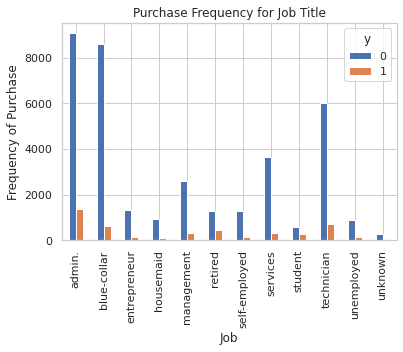

In [ ]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

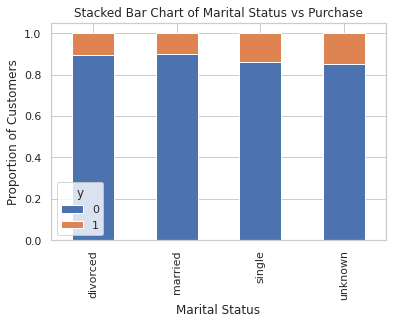

In [ ]:

table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

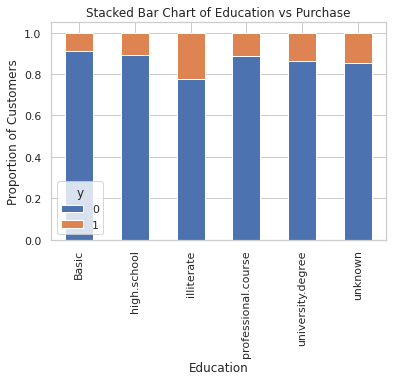

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency')

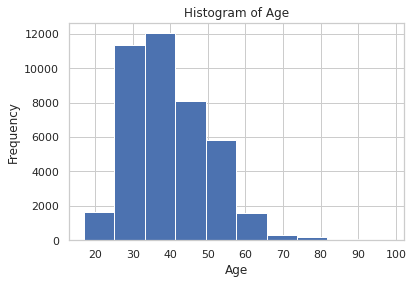

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Creation of Dummy Variables

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values
data.head()

ValueError: ignored

Over-sampling using SMOTE

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
print("type is:", type(os_data_y))


# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


type is: <class 'pandas.core.frame.DataFrame'>
length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())


In [ ]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False False False  True False
 False  True False  True False False  True False False False False False
 False False  True False False False False False False  True False False
 False False False False False False  True False False False  True  True
  True  True  True  True  True False  True False False  True  True False
  True]
[30 32  8 39  1  1 24 40 35 25  1 21 14  1 36  1 12 20  1 13  4 28 18 27
 10 41  1 29 34 31  5  9  7  1 42 11 23 33 17 22 26 15  1  3  2 37  1  1
  1  1  1  1  1 19  1  6 16  1  1 38  1]


In [ ]:
#The list of effective features
cols=[]
i= 0
f=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), data_final))
for c in f:
 cols.append(c[1])
print(cols)

['contact_cellular', 'day_of_week_fri', 'day_of_week_tue', 'day_of_week_wed', 'default_no', 'emp_var_rate', 'job_entrepreneur', 'job_management', 'job_services', 'marital_unknown', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_nonexistent', 'previous', 'y', 'month_apr', 'contact_telephone', 'job_technician', 'education_professional.course', 'day_of_week_mon', 'education_unknown', 'campaign', 'education_university.degree', 'marital_married', 'default_yes', 'job_retired', 'job_student', 'job_blue-collar', 'loan_yes', 'day_of_week_thu', 'housing_yes', 'job_unknown', 'month_sep', 'job_self-employed', 'job_admin.', 'loan_no', 'housing_no', 'cons_price_idx', 'nr_employed', 'loan_unknown', 'marital_divorced', 'job_unemployed', 'education_Basic', 'age', 'education_illiterate', 'duration', 'housing_unknown', 'education_high.school', 'euribor3m', 'job_housemaid', 'month_aug', 'poutcome_failure', 'pdays', 'cons_conf_idx', 'marital_single', 'd

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 

X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2021-01-11 01:46     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



The p-values for four variables are very high, therefore, we will remove them.

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2021-01-11 02:05  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

Logistic Regression Model Fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Turn off the regularization to get the same results are statsmodels in python
# I don't believe you can turn this off, but you can effectively negate regularization by setting the C parameter to a large number:
# model = LogisticRegression(C=1e8)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [ ]:
print(y_pred)

[0 1 1 ... 0 1 0]


Confusion Matrix¶

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2506 5169]]


The result is telling us that we have 6124+5169 correct predictions and 2506+1542 incorrect predictions.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



Interpretation:
Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer's preferred term deposit were promoted.

ROC Curve

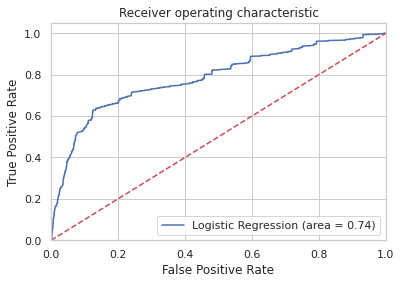

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Score Card Creation

In [ ]:
# df['Gain'] = df['Close*'] - df['Open']
X_test['Score'] = 0+ (X_test['euribor3m']  *-0.4488)+ \
(X_test['job_blue-collar']  * -0.2097)+ \
(X_test['job_housemaid']  * -0.2793 )+\
(X_test['marital_unknown']  * 0.7618 )+\
(X_test['education_illiterate']  * 1.3085 )+\
(X_test['month_apr']  * 1.28635 )+\
(X_test['month_aug']  * 1.3948 )+\
(X_test['month_dec']  * 1.8090 )+\
(X_test['month_jul']  * 1.6763 )+\
(X_test['month_jun']  * 1.5586 )+\
(X_test['month_mar']  * 2.8220  )+\
(X_test['month_may']  * 0.5867  )+\
(X_test['month_nov']  * 1.2735  )+\
(X_test['month_oct']  * 2.7225   )+\
(X_test['poutcome_failure']  * -0.2803    )+\
(X_test['poutcome_success']  * 1.9619    )


for col in X_test.columns: 
    print(col) 

X_test['ProbScore'] = round(1000/(1+np.exp(X_test['Score']*-1)))

euribor3m
job_blue-collar
job_housemaid
marital_unknown
education_illiterate
month_apr
month_aug
month_dec
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
poutcome_failure
poutcome_success
Gain
Score
ProbScore


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:

result = pd.concat([X_test, y_test], axis=1)
# for col in result.columns: 
#     print(col) 
result.to_csv('logit_scorecard.csv')
result.ProbScore.hist()

Histogram of Score

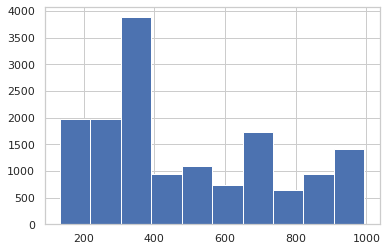

In [ ]:
result.ProbScore.hist()

In [ ]:
pd.read_excel(open('test_excel_model.xlsx', 'rb'),
              sheet_name='Sheet1') 

,Sni,Bname,BSIZE,Earning,TLTA,BVETA,PROFIT,CAR,GNPA,LCR,ROA,LR,NNPA,OpExpense,DepGrowth,STOCK_EXRET,STOCK_RANGE,SENTIMENT,SocialIndex
0,1,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
1,2,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
2,3,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
3,4,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
4,5,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
5,6,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
6,7,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
7,8,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
8,9,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
9,10,Punjab National Bank,232,0.03,4,6,NaN,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,-0.2,100
